<a href="https://colab.research.google.com/github/Leandro-Braga/Estudo_de_Caso/blob/main/S%C3%A9ries_log%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Séries logísticas

O conhecimento de logística oferece ao profissional a oportunidade de compreender a logística e a cadeia de suprimentos, indispensáveis ferramentas integradoras dos recursos e processos empresariais para a realização da estratégia corporativa.

O objetivo das empresas na fabricação de bens, na distribuição de insumos, no dimensionamento de transportes é verificar a capacidade em relação à quantidade produzida ou ofertada, utilizando completamente os seus recursos para obtenção máxima de lucratividade.

Surgiram os estudos sobre previsões de mercado ou de demanda, em que a estratégia era ofertar apenas o necessário para consumo e evitar o máximo todo tipo de desperdício. Em dias mais atuais, o mercado se tornou cada vez mais competitivo, não tendo espaço para subdimensionamento. A previsão de demanda é necessária e importante para o adequado uso dos recursos e das pessoas, fazendo com que as quantidades exatas para atender às atividades nos processos sejam inteligentemente programadas.

As séries temporais logísticas, principalmente as séries de demanda, podem apresentar algumas características que são comuns a outras séries temporais, como tendência, sazonalidade, pontos influentes, heterocedasticidade condicional e não linearidade. Então, podemos entender as séries logísticas como geradoras de processos estocásticos.

In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

Em seguida, carreguaremos o arquivo Excel, com a séries logísticas, e lembre-se de que o separador deve ser ponto e a data no formato americano.

In [27]:
df = pd.read_excel('sample_data/pim.xlsx' )
df.head()

,Month,Value
0,2005-01-01,81.0
1,2005-02-01,76.4
2,2005-03-01,88.0
3,2005-04-01,87.0
4,2005-05-01,91.1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   180 non-null    datetime64[ns]
 1   Value   180 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


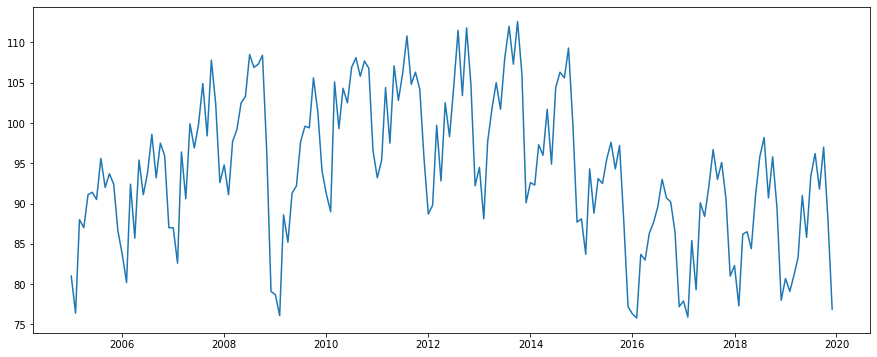

In [29]:
# plotar gráfico da Produção Industrial mensal PIM-PF
plt.plot(df.Month, df.Value);

Antes de fazer a decomposição da série, temos que transformar a data em índice:

In [30]:
# Transformar da data em índice
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)

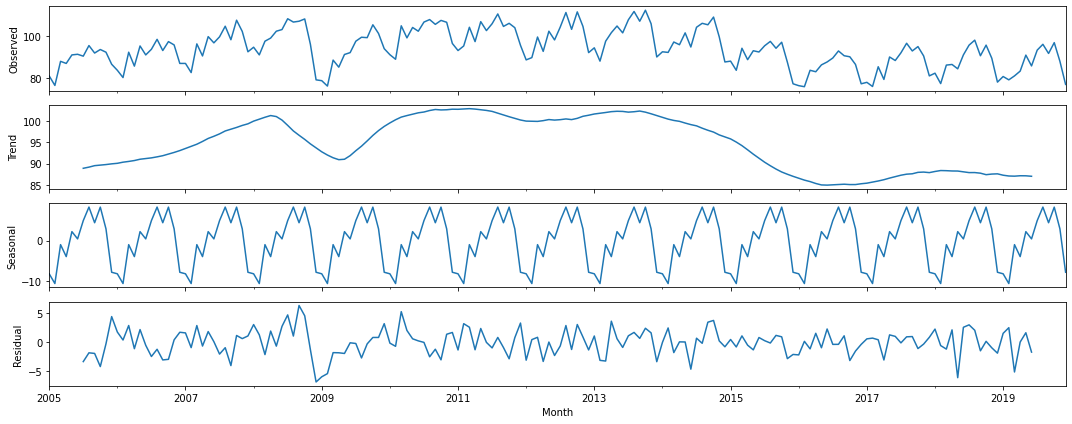

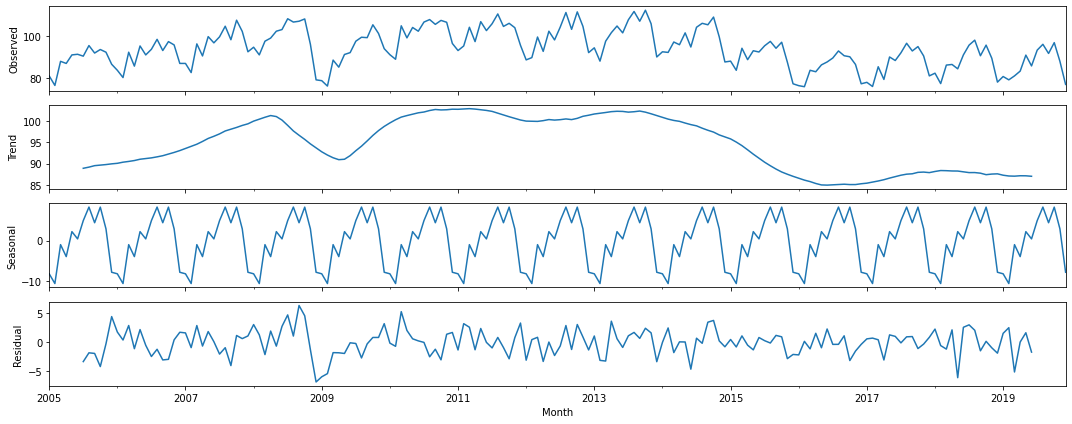

In [31]:
# salvar a decomposição no modelo aditivo
result = seasonal_decompose(df, model='additive')
result.plot()

Vamos aplicar a decomposição multiplicativa à série:

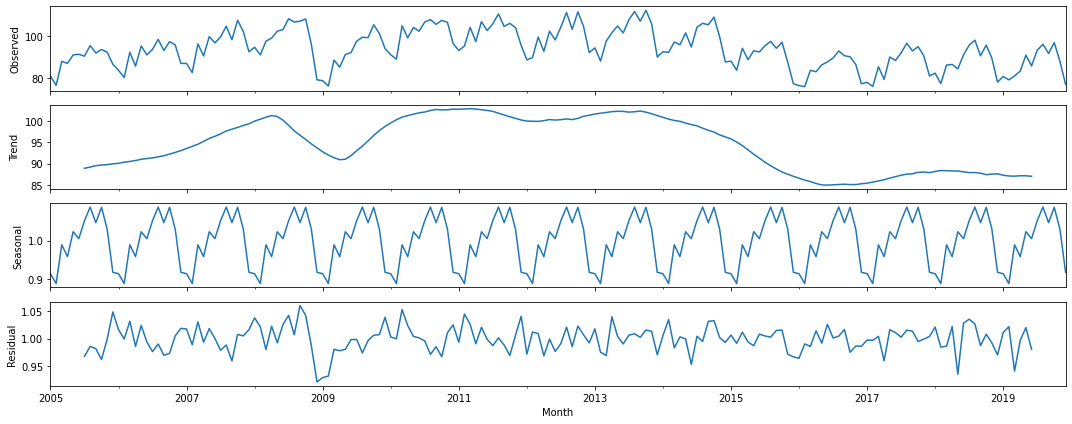

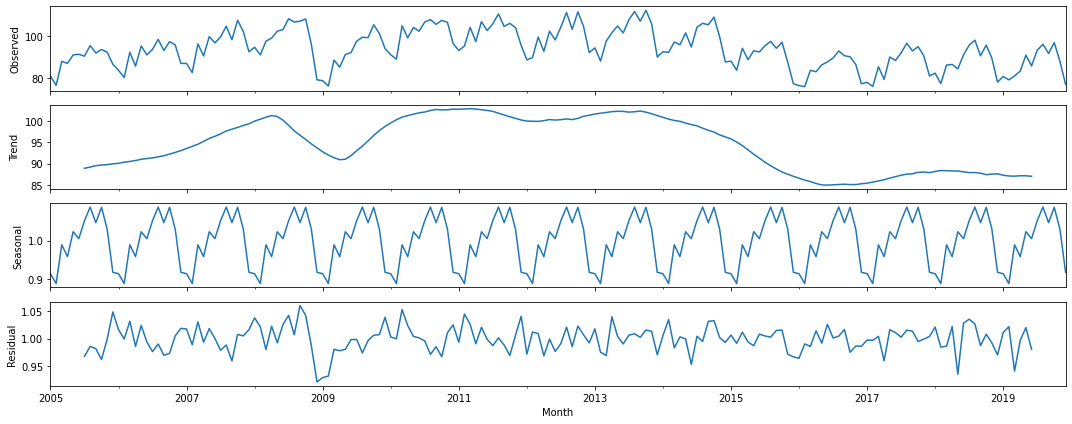

In [32]:
# decompõe a série de acordo com o modelo multiplicativo 
result = seasonal_decompose(df, model='multiplicative')
result.plot()

Observa-se um padrão muito similar entre os modelos de decomposição aditivo e multiplicativo, pois existe pouca ou nenhuma tendência na série. A diferença entre os modelos é maior quando a sazonalidade depende da tendência.

### Modelos de suavização para séries logísticas

Consiste em utilizar como previsão a média simples das observações mais recentes. Consideraremos a média de k valores consecutivos, podemos tomar a média do último ano, ou seja, os últimos 12 valores. O pacote Pandas tem funções específicas definidas para determinar médias móveis como:

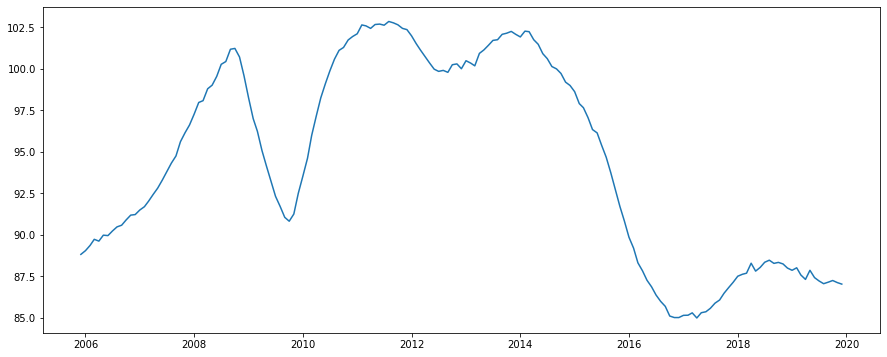

In [33]:
# Modelo de Médias Móveis com k=12
dados = df
mm = pd.DataFrame.rolling(dados,window=12,center=False).mean()
plt.plot(mm)

Outro exemplo:

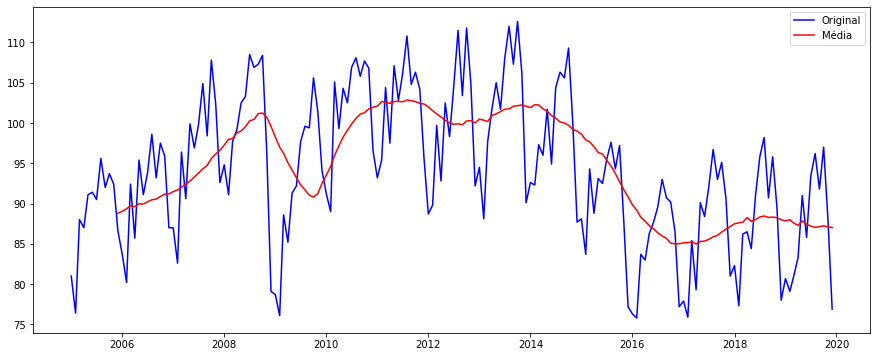

In [34]:
# Modelo de Médias Móveis comparado a série com k=12
mm = pd.DataFrame.rolling(dados,window=12,center=False).mean()
orig = plt.plot(dados, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Média')
plt.legend(loc='best')
plt.show()

Agora, vamos rodar o modelo de médias móveis para k=3, e o resultado obtido está ilustrado no gráfico a seguir:

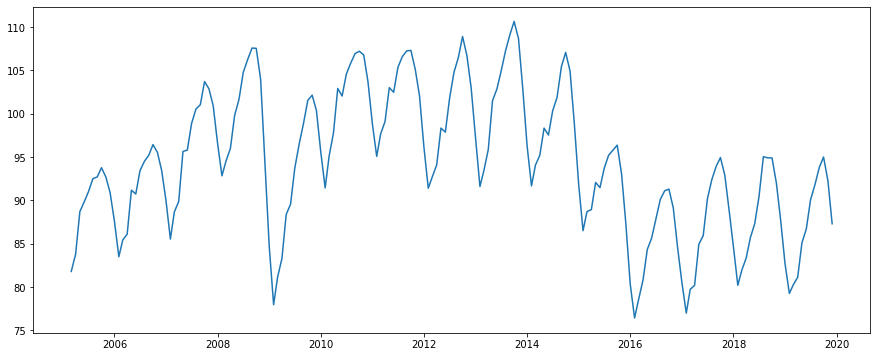

In [35]:
# Modelo de Médias Móveis com k=3
mm = pd.DataFrame.rolling(dados,window=3,center=False).mean()
plt.plot(mm)

Vamos executar o código com k=3.

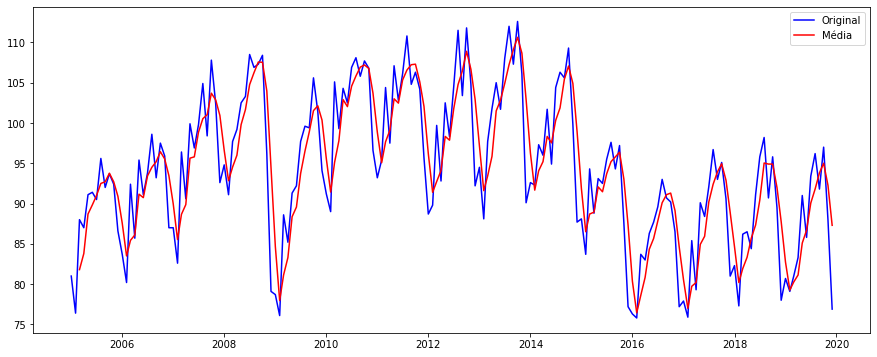

In [36]:
# Modelo de Médias Móveis comparado a série com k=3
mm = pd.DataFrame.rolling(dados,window=3,center=False).mean()
orig = plt.plot(dados, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Média')
plt.legend(loc='best')
plt.show()

Os dois modelos suavizam a série logística. No entanto, comparando-se o modelo médias móveis com k=12 e com k=3 observa-se que o modelo com k=12 retira os picos sazonais, o que não ocorre com k=3. Se quisermos realizar previsões para a série sem sazonalidade, devemos escolher o modelo de médias móveis com k=12.